# Selección óptima de portafolios I

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6e/Separation_theorem_of_MPT.svg/2000px-Separation_theorem_of_MPT.svg.png" width="400px" height="400px" />

En la clase pasada vimos que:
- La LAC describe las posibles selecciones de riesgo-rendimiento entre un activo libre de riesgo y un activo riesgoso.
- Su pendiente es igual al radio de Sharpe del activo riesgoso.
- La asignación óptima de capital para cualquier inversionista es el punto tangente de la curva de indiferencia del inversionista con la LAC (depende de las preferencias particulares - aversión al riesgo).

Para todo lo anterior, supusimos que ya teníamos el portafolio óptimo (activo riesgoso).

En el siguiente análisis:
 

**Objetivos:**
- ¿Cuál es el portafolio óptimo de activos riesgosos?
 - ¿Cuál es el mejor portafolio de activos riesgosos?
 - Es un portafolio eficiente en media-varianza.
- Problema: dado un conjunto de activos riesgosos, ¿cómo construimos la mejor combinación?

*Referencia:*
- Notas del curso "Portfolio Selection and Risk Management", Rice University, disponible en Coursera.
___ 

## 1. Maximizando el radio de Sharpe

### ¿Qué pasa si tenemos dos activos riesgosos?

Cuando tenemos dos activos riesgosos, tenemos disponibles diferentes LAC. ¿Qué significan sus pendientes?

<font color=blue> Ver en el tablero.</font>

Pregunta:
- ¿Qué es lo que se quiere?

**Conclusión:** 
- el *portafolio tangente* de la LAC más pendiente;
- por tanto, maximiza el radio de Sharpe para todos los posibles portafolios de activos riesgosos;
- este portafolio se conoce como el portafolio eficiente en media-varianza (EMV).

**Idea principal: el portafolio óptimo de activos riesgosos es independiente de las preferencias del inversionista.** 
- El portafolio EMV determina el portafolio óptimo de activos riesgosos.
- Todos tendremos el mismo portafolio de activos riesgosos (EMV), y lo combinaremos con el activo libre de reisgo de acuerdo con las preferencias de cada uno de nosotros (aversión al riesgo).
- La LAC combinando el activo libre de riesgo y el portafolio EMV, se vuelve el conjunto de portafolios eficientes.

Entonces, se deben seguir los siguientes pasos:
1. Crear la frontera media-varianza.
2. Encontrar el portafolio que maximize el radio de Sharpe (portafolio EMV).
3. Construir la frontera eficiente (LAC) del punto $(0,r_f)$ al punto $(E[r_s],\sigma_s)$ del portafolio EMV.
4. Combinar de acuerdo a sus preferencias.
___

## 2. Solución analítica del portafolio EMV: caso con dos activos.

Queremos solucionar el siguiente problema:

\begin{align}
\max_{w_1,w_2} &\quad \frac{E[r_p]-r_f}{\sigma_p}\\
\text{s.a.}    &\quad E[r_p]=w_1E[r_1]+w_2E[r_2]\\
               &\quad \sigma_p=\sqrt{w_1^2\sigma_1^2+w_2^2\sigma_2^2+2w_1w_2\rho_{12}\sigma_1\sigma_2}\\
               &\quad w_1+w_2=1, \quad w_1,w_2\geq0
\end{align}

el cual es equivalente a

\begin{align}
\max_{w_1} &\quad \frac{w_1E[r_1]+(1-w_1)E[r_2]-r_f}{\sqrt{w_1^2\sigma_1^2+(1-w_1)^2\sigma_2^2+2w_1(1-w_1)\rho_{12}\sigma_1\sigma_2}}\\
\text{s.a.}    &\quad 0\leq w_1\leq1
\end{align}

**Actividad.**
El anterior es un problema de maximizar una función de una variable en un dominio cerrado. No debaría representar dificultad.

Encontrar la solución analítica a este problema.

Quien primero lo haga, y salga a explicarlo al tablero, le subo alguna tarea, quiz o el primer examen a 100.

Deben llegar a:

$$w_{1,EMV}=\frac{(E[r_1]-r_f)\sigma_2^2-(E[r_2]-r_f)\sigma_{12}}{(E[r_2]-r_f)\sigma_1^2+(E[r_1]-r_f)\sigma_2^2-((E[r_1]-r_f)+(E[r_2]-r_f))\sigma_{12}}.$$

Si nadie lo ha hecho en 30 min., procederé a hacerlo yo.

**Nota:** 
- así como obtuvimos una expresión para el peso del portafolio de mínima varianza con dos activos, obtenemos una expresión para el peso del portafolio Eficiente en Media-Varianza. 
- Estas actividades son sin duda un buen ejercicio, y se pueden replicar usando técnicas de varias variables (multiplicadores de Lagrange) cuando se tengan más de dos activos.
- Sin embargo, la complejidad del problema crece considerablemente con el número de variables, y la solución analítica deja de ser viable cuando mencionamos que un portafolio bien diversificado consta aproximadamente de 50-60 activos.
- En esos casos, este problema se soluciona con rutinas numéricas que hagan la optimización por nosotros.
- Por eso, les enseño cómo resolver este problema con optimizadores numéricos, porque son una solución viable y escalable a más variables.



el mejor portafolio es el mismo para todos sin importar las preferencias y aversiones al riesgo

## 3. Ejemplo ilustrativo.

Retomamos el ejemplo de mercados de acciones en los países integrantes del $G5$: EU, RU, Francia, Alemania y Japón.

In [1]:
# Importamos pandas y numpy
import pandas as pd
import numpy as np

In [2]:
# Resumen en base anual de rendimientos esperados y volatilidades
annual_ret_summ = pd.DataFrame(columns=['EU', 'RU', 'Francia', 'Alemania', 'Japon'], index=['Media', 'Volatilidad'])
annual_ret_summ.loc['Media'] = np.array([0.1355, 0.1589, 0.1519, 0.1435, 0.1497])
annual_ret_summ.loc['Volatilidad'] = np.array([0.1535, 0.2430, 0.2324, 0.2038, 0.2298])

annual_ret_summ.round(4)

,EU,RU,Francia,Alemania,Japon
Media,0.1355,0.1589,0.1519,0.1435,0.1497
Volatilidad,0.1535,0.243,0.2324,0.2038,0.2298


In [3]:
# Matriz de correlación
corr = pd.DataFrame(data= np.array([[1.0000, 0.5003, 0.4398, 0.3681, 0.2663],
                                    [0.5003, 1.0000, 0.5420, 0.4265, 0.3581],
                                    [0.4398, 0.5420, 1.0000, 0.6032, 0.3923],
                                    [0.3681, 0.4265, 0.6032, 1.0000, 0.3663],
                                    [0.2663, 0.3581, 0.3923, 0.3663, 1.0000]]),
                    columns=annual_ret_summ.columns, index=annual_ret_summ.columns)
corr.round(4)

,EU,RU,Francia,Alemania,Japon
EU,1.0000,0.5003,0.4398,0.3681,0.2663
RU,0.5003,1.0000,0.5420,0.4265,0.3581
Francia,0.4398,0.5420,1.0000,0.6032,0.3923
Alemania,0.3681,0.4265,0.6032,1.0000,0.3663
Japon,0.2663,0.3581,0.3923,0.3663,1.0000


Supondremos, además, que la tasa libre de riesgo es $r_f=5\%$.

In [4]:
# Tasa libre de riesgo
rf = 0.05

Entonces, supondremos que tenemos disponibles los activos correspondientes a los mercados de acciones de EU y Japón, y en adición el activo libre de riesgo.

#### 1. Construir la frontera de mínima varianza

In [5]:
# Vector de w variando entre 0 y 1 con n pasos
n=101
w=np.linspace(0,1,n)
# Rendimientos esperados individuales
# Activo1: EU, Activo2:Japon
e1=annual_ret_summ['EU']['Media']
e2=annual_ret_summ['Japon']['Media']
# Volatilidades individuales
s1=annual_ret_summ['EU']['Volatilidad']
s2=annual_ret_summ['Japon']['Volatilidad']
# Correlacion
r12=corr['EU']['Japon']

In [6]:
# DataFrame de portafolios: 
# 1. Índice: i
# 2. Columnas 1-2: w, 1-w
# 3. Columnas 3-4: E[r], sigma
# 4. Columna 5: Sharpe ratio
portafolios=pd.DataFrame(index=np.arange(n),columns=['w','1-w','E[r](ret)','vol','SR'])
portafolios['w']=w
portafolios['1-w']=1-w
portafolios['E[r](ret)']=w*e1+(1-w)*e2
portafolios['vol']=np.sqrt((w*s1)**2+((1-w)*s2)**2+2*w*(1-w)*r12*s1*s2)
portafolios['SR']=(portafolios['E[r](ret)']-rf)/portafolios['vol']
portafolios

,w,1-w,E[r](ret),vol,SR
0,0.00,1.00,0.149700,0.229800,0.433856
1,0.01,0.99,0.149558,0.227916,0.436820
2,0.02,0.98,0.149416,0.226041,0.439814
3,0.03,0.97,0.149274,0.224176,0.442839
4,0.04,0.96,0.149132,0.222322,0.445894
5,0.05,0.95,0.148990,0.220478,0.448979
6,0.06,0.94,0.148848,0.218645,0.452094
7,0.07,0.93,0.148706,0.216823,0.455238
8,0.08,0.92,0.148564,0.215012,0.458411
9,0.09,0.91,0.148422,0.213213,0.461613


In [7]:
# Importar librerías de gráficos
import matplotlib.pyplot as plt
%matplotlib inline

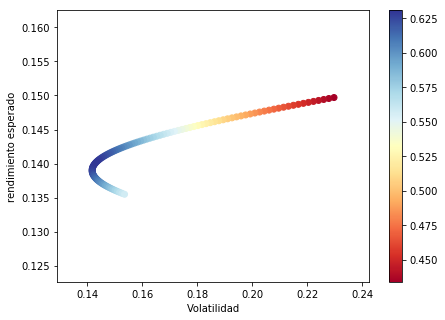

In [8]:
# Gráfica de dispersión de puntos coloreando 
# de acuerdo a SR
plt.figure(figsize=(7,5))
plt.scatter(portafolios['vol'],portafolios['E[r](ret)'],c=portafolios['SR'],cmap='RdYlBu')
plt.xlabel('Volatilidad')
plt.ylabel('rendimiento esperado')
plt.colorbar()
plt.show()

#### 2. Encontrar el portafolio que maximiza el radio de Sharpe (EMV)

Primero, encontramos este portafolio con la fórmula que obtuvimos:

In [9]:
# Fórmula que obtuvimos
wEMV=((e1-rf)*s2**2-(e2-rf)*r12*s1*s2)/((e2-rf)*s1**2+(e1-rf)*s2**2-((e1-rf)+(e2-rf))*r12*s1*s2)
wEMV

0.6983139170512034

Ahora sí, con la función scipy.optimize.minimize

In [10]:
# Importar el módulo optimize
from scipy.optimize import minimize

In [11]:
## Construcción de parámetros
## Activo 1: EU, Activo 2: Japon
# 1. Sigma: matriz de varianza-covarianza
sigma=np.array([[s1**2,     r12*s1*s2],
                [r12*s1*s2, s2**2]])
# 2. Eind: rendimientos esperados activos individuales
Eind=np.array([e1,e2])

In [12]:
# Función objetivo (-SR) para maximizar
def obj_func(w,Eind,sigma,rf):
    Erp=Eind.dot(w)
    sp=np.sqrt(w.dot(sigma).dot(w))
    Sharpe=(Erp-rf)/sp
    return -Sharpe

In [13]:
# Dato inicial
w0=np.ones(2)/2
# Cotas de las variables
bnds=((0,1),)*2
# Restricciones
cons=({'type': 'eq', 'fun': lambda w: np.sum(w)-1})

In [14]:
# Optimización numérica
PortEMV=minimize(obj_func,w0,args=(Eind,sigma,rf),bounds=bnds,constraints=cons)
# Resultado
PortEMV

     fun: -0.6308725303331167
     jac: array([-0.35171176, -0.35029621])
 message: 'Optimization terminated successfully.'
    nfev: 17
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.69830749, 0.30169251])

Con lo anterior, podemos obtener datos de rendimiento esperado y volatilidad del portafolio EMV

In [15]:
# Rendimiento esperado y volatilidad del portafolio EMV
wEMV=PortEMV.x
EpEMV=wEMV.dot(Eind)
spEMV=np.sqrt(wEMV.dot(sigma).dot(wEMV))
EpEMV,spEMV

(0.1397840336419269, 0.14231723418757614)

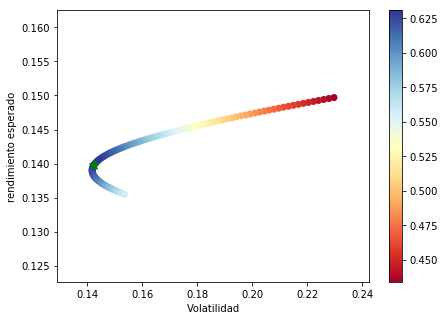

In [16]:
# Gráfica de dispersión de puntos coloreando 
# de acuerdo a SR, y portafolio EMV
plt.figure(figsize=(7,5))
plt.scatter(portafolios['vol'],portafolios['E[r](ret)'],c=portafolios['SR'],cmap='RdYlBu')
plt.plot(spEMV,EpEMV,'*g',ms=10)

plt.xlabel('Volatilidad')
plt.ylabel('rendimiento esperado')
plt.colorbar()
plt.show()

#### 3. Construir LAC

Ahora, dibujamos la LAC, combinando el portafolio EMV con el activo libre de riesgo:

In [17]:
# Vector de wp variando entre 0 y 1.5 con n pasos
wp=np.linspace(0,1.5,n)

In [18]:
# DataFrame de CAL: 
# 1. Índice: i
# 2. Columnas 1-2: wp, wrf
# 3. Columnas 3-4: E[r], sigma
# 4. Columna 5: Sharpe ratio
LAC=pd.DataFrame(index=np.arange(n),columns=['wp','wrf','E[r]','vol','SR'])
LAC['wp']=wp
LAC['wrf']=1-wp
LAC['E[r]']=wp*EpEMV+(1-wp)*rf
LAC['vol']=wp*spEMV
LAC['SR']=(LAC['E[r]']-rf)/LAC['vol']

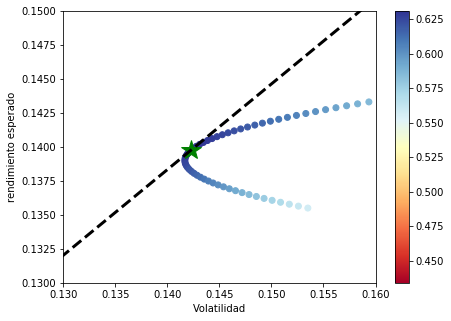

In [19]:
# Gráfica de dispersión de puntos coloreando 
# de acuerdo a SR, portafolio EMV y LAC
plt.figure(figsize=(7,5))
plt.scatter(portafolios['vol'],portafolios['E[r](ret)'],c=portafolios['SR'],cmap='RdYlBu')
plt.plot(spEMV,EpEMV,'*g',ms=20)
plt.plot(LAC['vol'],LAC['E[r]'],'k--',lw=3)
plt.xlabel('Volatilidad')
plt.ylabel('rendimiento esperado')
plt.colorbar()
plt.xlim([.13,.16])
plt.ylim([.13,.15])
plt.show()

#### 4. Combinación óptima de acuerdo a preferencias

Con los datos anteriores, y la caracterización de aversión al riesgo, se escoge la combinación óptima entre el portafolio EMV y el activo libre de riesgo de acuerdo a:

$$w^\ast=\frac{E[r_s-r_f]}{\gamma\sigma_s^2}.$$

In [24]:
# Para gamma=7
(EpEMV-rf)/(7*(spEMV**2))


0.6332658704683628

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>